In [6]:
install.packages("RSelenium")
library(RSelenium)
#citation("RSelenium")

The following package(s) will be installed:
- RSelenium [1.7.9]
These packages will be installed into "~/renv/library/linux-ubuntu-jammy/R-4.4/x86_64-pc-linux-gnu".

# Installing packages --------------------------------------------------------
- Installing RSelenium ...                      OK [linked from cache]


In [21]:
install.packages("rvest")
install.packages("dplyr")
install.packages("readr")
install.packages("htmlwidgets")



The following package(s) will be installed:
- rvest [1.0.4]
These packages will be installed into "~/renv/library/linux-ubuntu-jammy/R-4.4/x86_64-pc-linux-gnu".

# Installing packages --------------------------------------------------------
- Installing rvest ...                          OK [linked from cache]
The following package(s) will be installed:
- dplyr [1.1.4]
These packages will be installed into "~/renv/library/linux-ubuntu-jammy/R-4.4/x86_64-pc-linux-gnu".

# Installing packages --------------------------------------------------------
- Installing dplyr ...                          OK [linked from cache]
The following package(s) will be installed:
- readr [2.1.5]
These packages will be installed into "~/renv/library/linux-ubuntu-jammy/R-4.4/x86_64-pc-linux-gnu".

# Installing packages --------------------------------------------------------
- Installing readr ...                          OK [linked from cache]
The following package(s) will be installed:
- htmlwidgets [1.6.4

In [1]:
# Charger les biblioth√®ques n√©cessaires
library(rvest)
library(dplyr)
library(readr)
library(DT)
library(httr)

# URL de base pour la recherche de produits sur Amazon
base_url <- "https://www.amazon.com/s?i=specialty-aps&bbn=16225007011&rh=n%3A16225007011%2Cn%3A13896617011&page="

# Initialiser des vecteurs pour stocker les d√©tails des produits
titles <- c()
prices <- c()
ratings <- c()
features <- list()

# Boucle √† travers plusieurs pages ( les 3 premi√®res pages)
for (page in 1:3) {
  # Construire l'URL pour la page courante
  main_url <- paste0(base_url, page)
  
    # Tenter de lire le contenu HTML de l'URL principale
  response <- GET(main_url, add_headers("User-Agent" = "Mozilla/5.0"))
  
 # V√©rifier si la requ√™te a r√©ussi
  if (status_code(response) == 200) {
    main_page <- content(response, "text")
    
    # Analyser le contenu HTML
    main_page <- read_html(main_page)
    Sys.sleep(sample(5:10, 1))  # Random delay between 5 and 10 seconds
    
   # Extraire les URLs des pages de produits individuelles
    product_urls <- main_page %>%
      html_nodes("[class='a-link-normal s-no-outline']") %>%
      html_attr("href") %>%
      unique()
    
    # URL de base pour Amazon
    base_url_full <- "https://www.amazon.com"
    
    # Boucle √† travers chaque URL de produit pour extraire les d√©tails
    for (url in product_urls) {
      tryCatch({
        product_page_response <- GET(paste0(base_url_full, url), add_headers("User-Agent" = "Mozilla/5.0"))
        
        if (status_code(product_page_response) == 200) {
          product_page <- content(product_page_response, "text")
          product_page <- read_html(product_page)
          Sys.sleep(sample(5:10, 1))  # D√©lai al√©atoire entre les requ√™tes
          
         # Extraire le titre du produit
          title <- product_page %>%
            html_node("#productTitle") %>%
            html_text() %>%
            trimws()
          
          # Extraire le prix du produit
          price <- product_page %>%
            html_node(".a-price .a-offscreen") %>%
            html_text() %>%
            trimws()
          
         # Extraire les √©valuations du produit
          rating <- product_page %>%
            html_node(".a-icon-alt") %>%
            html_text() %>%
            trimws()
          
          # Extraire les caract√©ristiques et sp√©cifications du produit
          feature <- product_page %>%
            html_nodes("#feature-bullets ul.a-unordered-list li") %>%
            html_text() %>%
            trimws()
          
         # Ajouter les d√©tails aux vecteurs
          titles <- c(titles, title)
          prices <- c(prices, price)
          ratings <- c(ratings, rating)
          features <- append(features, list(feature))
        } else {
          message(paste("Failed to access product page:", url))
        }
        
      }, error = function(e) {
        message(paste("Error occurred while processing:", url))
        message(e)
      })
    }
    
  } else {
    message(paste("Error occurred while accessing:", main_url))
    message(paste("Status code:", status_code(response)))
  }
}

# Cr√©er un dataframe avec les d√©tails extraits
data <- data.frame(
  Title = titles,
  Price = prices,
  Ratings = ratings,
  Features = I(features),
  stringsAsFactors = FALSE
)

# √âcrire les donn√©es dans un fichier CSV
write_csv(data, "my_products.csv")

# Afficher les donn√©es dans une datatable
datatable(data)


Attaching package: ‚Äòdplyr‚Äô


The following objects are masked from ‚Äòpackage:stats‚Äô:

    filter, lag


The following objects are masked from ‚Äòpackage:base‚Äô:

    intersect, setdiff, setequal, union



Attaching package: ‚Äòreadr‚Äô


The following object is masked from ‚Äòpackage:rvest‚Äô:

    guess_encoding




HTML widgets cannot be represented in plain text (need html)


Attaching package: ‚Äòdplyr‚Äô


The following objects are masked from ‚Äòpackage:stats‚Äô:

    filter, lag


The following objects are masked from ‚Äòpackage:base‚Äô:

    intersect, setdiff, setequal, union




'data.frame':	43 obs. of  4 variables:
 $ Title   : chr  "Samsung Galaxy Tab A9+ Tablet 11‚Äù 64GB Android Tablet, Big Screen, Quad Speakers, Upgraded Chipset, Multi Windo"| __truncated__ "SAMSUNG Galaxy Tab A9+ Plus Kids Edition 11‚Äù 64GB WiFi 7 Android AI Tablet, Long Battery Life, Expandable Stora"| __truncated__ "Samsung Galaxy Tab A9+ Plus 11‚Äù 64GB Android Tablet, Big Screen, Quad Speakers, Upgraded Chipset, Multi Window "| __truncated__ "SAMSUNG Galaxy Tab A9+ Plus Kids Edition 11‚Äù 64GB WiFi 7 Android AI Tablet, Long Battery Life, Expandable Stora"| __truncated__ ...
 $ Price   : chr  "$149.00" "$199.99" "$149.00" "$199.99" ...
 $ Ratings : chr  "4.5 out of 5 stars" "4.5 out of 5 stars" "4.5 out of 5 stars" "4.5 out of 5 stars" ...
 $ Features: chr  "c(\"BIG SCREEN. FAMILY-SIZED FUN: Bring fun home to everyone with a bright, engaging screen; great for videos, "| __truncated__ "c(\"FAMILY-SIZE SCREEN. KID-FRIENDLY FUN: A bright, engaging 11\\\" screen lets kids stream, learn 

Warning message in eval(expr, envir, enclos):
‚ÄúNAs introduced by coercion‚Äù


[1] "Certaines valeurs de prix n'ont pas pu √™tre converties."
[1] NA


Warning message in eval(expr, envir, enclos):
‚ÄúNAs introduced by coercion‚Äù


[1] "Certaines valeurs de ratings sont manquantes ou mal format√©es."


    Title               Price           Ratings      Features        
 Length:39          Min.   : 97.99   Min.   : NA   Length:39         
 Class :character   1st Qu.:164.43   1st Qu.: NA   Class :character  
 Mode  :character   Median :199.99   Median : NA   Mode  :character  
                    Mean   :230.69   Mean   :NaN                     
                    3rd Qu.:279.00   3rd Qu.: NA                     
                    Max.   :449.95   Max.   : NA                     
                                     NA's   :39                      

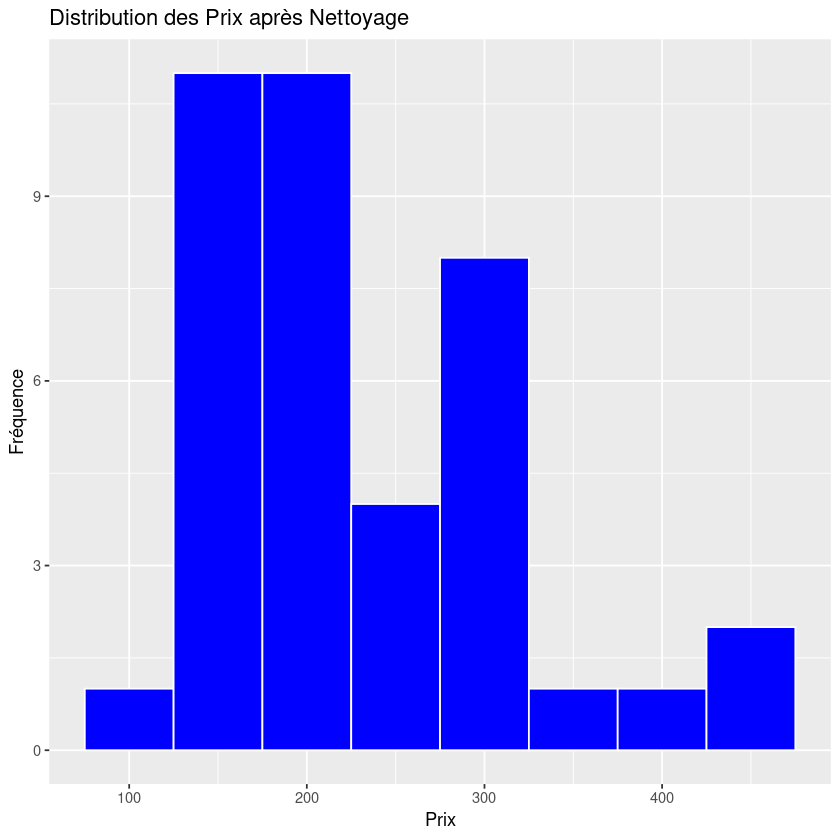

In [3]:
library(dplyr)
library(readr)
library(ggplot2)

# Charger les donn√©es
data <- read.csv("my_products.csv", stringsAsFactors = FALSE)

# Afficher la structure des donn√©es
str(data)

# 1. Nettoyage des valeurs manquantes
# Remplacer les valeurs manquantes dans 'Title' et 'Features' par "Non sp√©cifi√©" (ou autre valeur pertinente)
data$Title[is.na(data$Title)] <- "Non sp√©cifi√©"
data$Features[is.na(data$Features)] <- "Non sp√©cifi√©"

# 2. Nettoyage de la colonne 'Price' : suppression du symbole $ et conversion en num√©rique
data$Price <- as.numeric(gsub("\\$", "", data$Price))

# V√©rifier si la conversion a introduit des NAs dans 'Price'
if (any(is.na(data$Price))) {
  print("Certaines valeurs de prix n'ont pas pu √™tre converties.")
  print(data[is.na(data$Price), "Price"])
}

# 3. Nettoyage de la colonne 'Ratings' : extraction du score num√©rique
data$Ratings <- as.numeric(gsub(" out of 5 stars", "", gsub(" ", "", data$Ratings)))

# V√©rifier si la conversion a bien fonctionn√©
if (any(is.na(data$Ratings))) {
  print("Certaines valeurs de ratings sont manquantes ou mal format√©es.")
}

# 4. Suppression des outliers dans 'Price' avec la m√©thode IQR
Q1 <- quantile(data$Price, 0.25, na.rm = TRUE)
Q3 <- quantile(data$Price, 0.75, na.rm = TRUE)
IQR <- Q3 - Q1

# Identifier les bornes inf√©rieures et sup√©rieures des outliers
lower_bound <- Q1 - 1.5 * IQR
upper_bound <- Q3 + 1.5 * IQR

# Filtrer les outliers
data_cleaned <- data %>% filter(Price >= lower_bound & Price <= upper_bound)

# 5. Imputation des valeurs manquantes restantes (si n√©cessaire)
# Si la colonne 'Ratings' ou 'Price' contient encore des NA, nous pouvons les remplacer par la moyenne
data_cleaned$Price[is.na(data_cleaned$Price)] <- mean(data_cleaned$Price, na.rm = TRUE)
data_cleaned$Ratings[is.na(data_cleaned$Ratings)] <- mean(data_cleaned$Ratings, na.rm = TRUE)

# 6. Afficher les statistiques r√©sum√©es apr√®s nettoyage
summary(data_cleaned)

# 7. Visualisation des prix apr√®s nettoyage
ggplot(data_cleaned, aes(x = Price)) +
  geom_histogram(binwidth = 50, fill = "blue", color = "white") +
  labs(title = "Distribution des Prix apr√®s Nettoyage", x = "Prix", y = "Fr√©quence")

# 8. Enregistrer les donn√©es nettoy√©es
write.csv(data_cleaned, "cleaned_my_products.csv", row.names = FALSE)

In [5]:
library(dplyr)
library(stringr)

# Charger les donn√©es nettoy√©es
data_cleaned <- read.csv("cleaned_my_products.csv", stringsAsFactors = FALSE)

# Fonction pour g√©n√©rer une URL de recherche sur Amazon
generate_amazon_url <- function(title, features) {
  # Combine le titre et les fonctionnalit√©s pour cr√©er une requ√™te de recherche
  search_query <- paste(title, features, sep = " ")
  
  # Remplacer les espaces par des "+" pour correspondre √† l'URL de recherche Amazon
  search_query <- str_replace_all(search_query, " ", "+")
  
  # Cr√©er l'URL de recherche Amazon
  url <- paste0("https://www.amazon.com/s?k=", search_query)
  
  return(url)
}

# Ajouter la colonne 'URL' en appliquant la fonction √† chaque ligne
data_cleaned$URL <- mapply(generate_amazon_url, data_cleaned$Title, data_cleaned$Features)

# V√©rifier le r√©sultat
head(data_cleaned)

# Enregistrer les donn√©es avec la colonne URL ajout√©e
write.csv(data_cleaned, "data_with_urls.csv", row.names = FALSE)

Title                                                                                                                                                                                       
1 Samsung Galaxy Tab A9+ Tablet 11‚Äù 64GB Android Tablet, Big Screen, Quad Speakers, Upgraded Chipset, Multi Window Display, Slim, Light, Durable Design, US Version, 2024, Graphite           
2 SAMSUNG Galaxy Tab A9+ Plus Kids Edition 11‚Äù 64GB WiFi 7 Android AI Tablet, Long Battery Life, Expandable Storage, Thin, Light Design, Durable Puffy Cover, US Version, 2024, Red           
3 Samsung Galaxy Tab A9+ Plus 11‚Äù 64GB Android Tablet, Big Screen, Quad Speakers, Upgraded Chipset, Multi Window Display, Slim, Light, Durable, Kids Friendly Design, US Version, 2024, Silver
4 SAMSUNG Galaxy Tab A9+ Plus Kids Edition 11‚Äù 64GB WiFi 7 Android AI Tablet, Long Battery Life, Expandable Storage, Thin, Light Design, Durable Puffy Cover, US Version, 2024, Yellow        
5 Apple iPad (10.2-Inch, Wi-Fi, 32GB) - Space Gray (Renewed)                                                                                                                                  
6 Apple iPad 7th Gen 32GB, WiFi, Gold - MW762LL/A                                                                                                                                             
  Price  Ratings
1 149.00 NA     
2 199.99 NA     
3 149.00 NA     
4 199.99 NA     
5 157.48 NA     
6 169.00 NA     
  Features                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
1 c("BIG SCREEN. FAMILY-SIZED FUN: Bring fun home to everyone with a bright, engaging screen; great for videos, games or fun time for the kids (11‚Äù 1920 x 1200, 90Hz, 480 nits, TFT LCD)", "RICH SOUND ALL AROUND: Your music; Your shows; Your games; Hear them all loud and clear, thanks to quad speakers powered by Dolby Atmos; Galaxy Tab A9+ delivers a cinema-like audio experience your ear

[1] "Produit avec le prix le plus √©lev√©:"
                                                                                                                                                                                                     Title
1 Samsung Galaxy Tab S9 FE 10.9‚Äù 256GB WiFi Android Tablet, Large Display, Long Battery Life, Powerful Processor, S Pen, 8MP Camera, Lightweight Durable Design, Expandable Storage,US Version 2023,Silver
   Price Ratings
1 449.95      NA
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

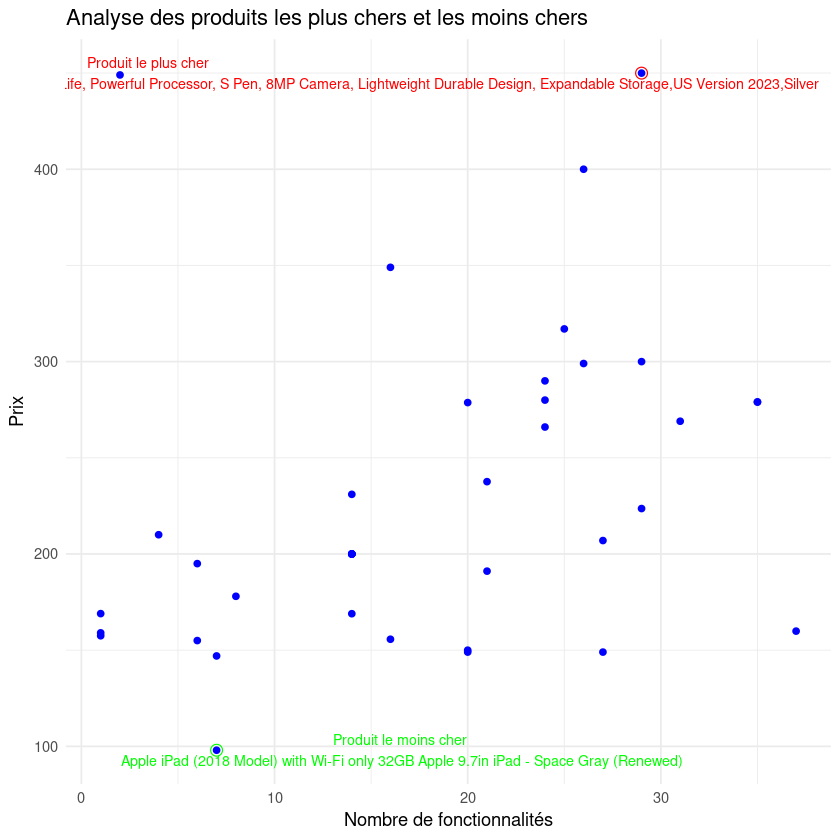

In [19]:
library(ggplot2)
library(dplyr)
library(ggrepel)  # Ajouter le package ggrepel pour √©viter les chevauchements de texte

# Charger les donn√©es nettoy√©es
data_cleaned <- read.csv("cleaned_my_products.csv", stringsAsFactors = FALSE)

# Ajouter la colonne 'Feature_count' en comptant le nombre de fonctionnalit√©s pour chaque produit
data_cleaned$Feature_count <- sapply(data_cleaned$Features, function(x) length(strsplit(x, ",")[[1]]))

# Produit avec le prix le plus √©lev√©
most_expensive_product <- data_cleaned %>% 
  filter(Price == max(Price, na.rm = TRUE))

# Produit avec le prix le plus bas
cheapest_product <- data_cleaned %>% 
  filter(Price == min(Price, na.rm = TRUE))

# Afficher les produits les plus chers et les moins chers
print("Produit avec le prix le plus √©lev√©:")
print(most_expensive_product)

print("Produit avec le prix le plus bas:")
print(cheapest_product)

# Cr√©er un graphique pour visualiser les produits les plus chers et les moins chers
p <- ggplot(data_cleaned, aes(x = Feature_count, y = Price)) +
  geom_point(color = "blue") +  # Scatter plot standard
  
  # Ajouter le produit le plus cher en rouge
  geom_point(data = most_expensive_product, aes(x = Feature_count, y = Price), 
             color = "red", size = 3, shape = 1) +  
  
  # Ajouter le produit le moins cher en vert
  geom_point(data = cheapest_product, aes(x = Feature_count, y = Price), 
             color = "green", size = 3, shape = 1) +  
  
  # Ajouter des labels pour le produit le plus cher et le moins cher
  geom_text_repel(data = most_expensive_product, aes(x = Feature_count, y = Price, 
                                                     label = paste("Produit le plus cher\n", Title)),
                  color = "red", size = 3, box.padding = 0.5, max.overlaps = 10) +  # Ajouter les labels pour le produit le plus cher
  
  geom_text_repel(data = cheapest_product, aes(x = Feature_count, y = Price, 
                                              label = paste("Produit le moins cher\n", Title)),
                  color = "green", size = 3, box.padding = 0.5, max.overlaps = 10) +  # Ajouter les labels pour le produit le moins cher
  
  labs(title = "Analyse des produits les plus chers et les moins chers", 
       x = "Nombre de fonctionnalit√©s", 
       y = "Prix") +
  theme_minimal()

# Afficher le graphique
print(p)


In [25]:
library(ggplot2)
library(plotly)
library(dplyr)

# Charger les donn√©es nettoy√©es
data_cleaned <- read.csv("cleaned_my_products.csv", stringsAsFactors = FALSE)

# Ajouter la colonne 'Feature_count' en comptant le nombre de fonctionnalit√©s pour chaque produit
data_cleaned$Feature_count <- sapply(data_cleaned$Features, function(x) length(strsplit(x, ",")[[1]]))

# Filtrer les produits avec un prix bas (par exemple, prix inf√©rieur ou √©gal √† 200)
price_threshold <- 200
products_with_low_price <- data_cleaned %>%
  filter(Price <= price_threshold)

# Identifier le produit avec le plus grand nombre de fonctionnalit√©s parmi ceux avec un prix bas
product_with_max_features <- products_with_low_price %>% 
  filter(Feature_count == max(Feature_count, na.rm = TRUE))

# Ajouter une colonne pour le texte √† afficher (par exemple, le nom du produit et le lien)
product_with_max_features$Label <- "Produit"
product_with_max_features$URL <- paste0("https://www.amazon.com", product_with_max_features$Product_URL)  # Ajouter l'URL du produit sp√©cifique

# Cr√©er le graphique avec ggplot
p <- ggplot(data_cleaned, aes(x = Feature_count, y = Price, text = paste("Titre: ", Title, "<br>Prix: ", Price, "<br>Note: ", Ratings, "<br>Fonctionnalit√©s: ", Features))) +
  geom_point(color = "blue") +  # Scatter plot standard
  geom_point(data = product_with_max_features, aes(x = Feature_count, y = Price), 
             color = "red", size = 3, shape = 1) +  # Entourer le produit en rouge
  geom_text(data = product_with_max_features, aes(x = Feature_count, y = Price, label = Label), 
            color = "red", vjust = -1, size = 6, fontface = "bold") +  # Ajouter du texte en rouge et plus grand
  labs(title = "Produit avec le plus de fonctionnalit√©s √† prix bas", x = "Nombre de fonctionnalit√©s", y = "Prix") +
  theme_minimal()

# Convertir ggplot en graphique interactif avec plotly
p_interactive <- ggplotly(p, tooltip = "text")

# Ajouter un lien hypertexte cliquable sur le texte du produit
p_interactive <- p_interactive %>% 
  add_annotations(
    x = product_with_max_features$Feature_count, 
    y = product_with_max_features$Price, 
    text = paste('<a href="', product_with_max_features$URL, '" target="_blank">Produit</a>', sep = ""),  # Le texte visible sous forme de lien HTML
    showarrow = TRUE, 
    arrowhead = 2,
    font = list(color = "red", size = 18),  # Le texte "Produit" sera en rouge et de taille 18
    ax = 20, ay = -30,
    valign = "middle",
    align = "center"
  )

# Fonction pour afficher la ligne correspondante dans le dataset lors du clic
display_product_info <- function(event_data) {
  # Extraire l'indice du produit cliqu√©
  clicked_index <- event_data$pointNumber + 1  # Plotly indexe √† partir de 0
  
  # S√©lectionner les informations du produit
  product <- data_cleaned[clicked_index, ]
  
  # Afficher la ligne correspondante dans le dataset dans la console
  cat("\nInformations du produit s√©lectionn√© :\n")
  print(product)
}

# Convertir le graphique interactif avec plotly et capturer les clics
p_interactive <- p_interactive %>%
  onRender("
    function(el, x) {
      el.on('plotly_click', function(eventData) {
        // Appeler la fonction pour afficher les informations dans la console
        Shiny.setInputValue('clicked_product', eventData);
      });
    }")

# Observer le clic et afficher les informations dans la console
observe({
  event_data <- input$clicked_product
  if (!is.null(event_data)) {
    display_product_info(event_data)
  }
})

# Afficher le graphique interactif
p_interactive


HTML widgets cannot be represented in plain text (need html)

Apr√®s avoir analys√© ce graphique, voici une d√©couverte importante : Le produit avec le plus grand nombre de fonctionnalit√©s √† un prix bas (inf√©rieur √† 200 USD) est le "Acer Gateway Chromebook 311 CBO311-1H-C1MX". Ce mod√®le se distingue par un excellent rapport qualit√©/prix pour ceux qui recherchent un ordinateur portable avec de bonnes caract√©ristiques sans avoir √† d√©penser une fortune.

D√©tails du produit : Titre du produit : Acer Gateway Chromebook 311 CBO311-1H-C1MX Laptop Processeur : Intel Celeron N4500 √âcran : 11.6" HD (1366 x 768) Display M√©moire : 4GB LPDDR4X Stockage : 64GB eMMC Wi-Fi : Wi-Fi 5 802.11ac Syst√®me d'exploitation : Chrome OS Couleur : Star Black Ce produit est particuli√®rement int√©ressant pour les utilisateurs √† la recherche d'un ordinateur portable fonctionnel √† un prix abordable. Malgr√© un prix inf√©rieur √† 200 USD, il offre un processeur d√©cent, un bon affichage, et un stockage suffisant pour des t√¢ches quotidiennes comme la navigation sur Internet, la r√©daction de documents, et les applications basiques.